Epoch 1/20


d:\tensorflow\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 1s - 3ms/step - accuracy: 0.1903 - loss: 0.0890 - val_accuracy: 0.2959 - val_loss: 0.0860
Epoch 2/20
469/469 - 1s - 2ms/step - accuracy: 0.3720 - loss: 0.0829 - val_accuracy: 0.4478 - val_loss: 0.0792
Epoch 3/20
469/469 - 1s - 2ms/step - accuracy: 0.4815 - loss: 0.0760 - val_accuracy: 0.5342 - val_loss: 0.0721
Epoch 4/20
469/469 - 1s - 2ms/step - accuracy: 0.5654 - loss: 0.0691 - val_accuracy: 0.6176 - val_loss: 0.0650
Epoch 5/20
469/469 - 1s - 2ms/step - accuracy: 0.6489 - loss: 0.0622 - val_accuracy: 0.6915 - val_loss: 0.0582
Epoch 6/20
469/469 - 1s - 2ms/step - accuracy: 0.7015 - loss: 0.0560 - val_accuracy: 0.7256 - val_loss: 0.0525
Epoch 7/20
469/469 - 1s - 2ms/step - accuracy: 0.7255 - loss: 0.0510 - val_accuracy: 0.7460 - val_loss: 0.0480
Epoch 8/20
469/469 - 1s - 2ms/step - accuracy: 0.7394 - loss: 0.0470 - val_accuracy: 0.7581 - val_loss: 0.0445
Epoch 9/20
469/469 - 1s - 2ms/step - accuracy: 0.7508 - loss: 0.0440 - val_accuracy: 0.7668 - val_loss: 0.0417
Epoch 10/20


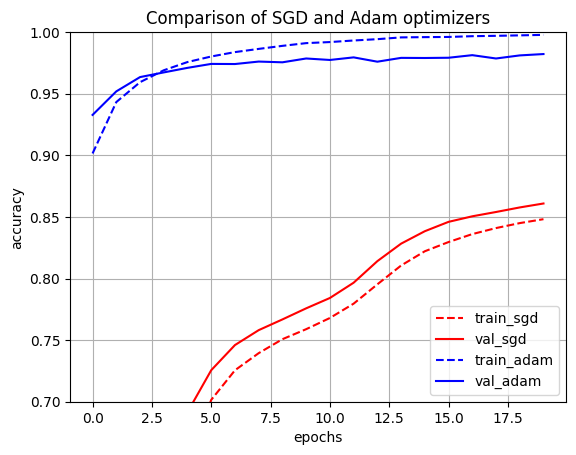

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

# 학습 데이터 로드
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
# 데이터 값에 대한 처리... 
# 784 값은 앞서 얻었던 (60000, 28, 28)의 값을 변형한 것임.
# 2차원 텐서의 값을 1차원 형식으로 표현.  
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
# 각 값을 0 ~ 1 사이의 값으로 변환
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
# 각 레이블을 표현하는 값을 categorical로 변환
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델(SGD)
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

# 모델 컴파일(SGD)
mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
# 모델 학습(SGD)
hist_sgd = mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)
# 모델 검증(SGD)
res=mlp_sgd.evaluate(x_test,y_test,verbose=0)
print('(SGD)정확률=',res[1]*100)

# 모델(Adam)
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

# 모델 컴파일(Adam)
mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
# 모델 학습(Adam)
hist_adam = mlp_adam.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test),verbose=2)

# 모델 검증(Adam)
res = mlp_adam.evaluate(x_test,y_test,verbose=0)
print('정확률=',res[1]*100)


import matplotlib.pyplot as plt

plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 모델(딥러닝, 활성화=렐루)
dmlp=Sequential()
dmlp.add(Dense(units=1024,activation='relu',input_shape=(784,)))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=512,activation='relu'))
dmlp.add(Dense(units=10,activation='softmax'))

# 모델 컴파일
dmlp.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
# 모델 학습
hist=dmlp.fit(x_train,y_train,
              batch_size=128,
              epochs=50,
              validation_data=(x_test,y_test),
              verbose=2)

print('정확률=', dmlp.evaluate(x_test,y_test,verbose=0)[1]*100)

# 모델 저장
dmlp.save('dmlp_trained.h5')

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.grid()
plt.show()

KeyboardInterrupt: 

In [2]:
import numpy as np
import tensorflow as tf
import cv2 as cv 
import matplotlib.pyplot as plt
# import winsound

# 7-5.py 에서 학습한 모델로드
# 우편번호 인식 프로그램
# 5자의 숫자를 인식하는 프로그램
model=tf.keras.models.load_model('dmlp_trained.h5')

# 글씨 초기화
def reset():
    global img
       
    img=np.ones((200,520,3),dtype=np.uint8)*255
    for i in range(5):
        cv.rectangle(img,(10+i*100,50),(10+(i+1)*100,150),(0,0,255))
    cv.putText(img,'e:erase s:show r:recognition q:quit',(10,40),cv.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),1)

# 입력한 숫자이미지를 불러서 저장 -> numerals=[] 리스트로 저장해서 반환
def grab_numerals():
    numerals=[]
    for i in range(5):
        roi=img[51:149,11+i*100:9+(i+1)*100,0]
        roi=255-cv.resize(roi,(28,28),interpolation=cv.INTER_CUBIC)
        numerals.append(roi)  
    numerals=np.array(numerals)
    return numerals

# grap_numerals에 있는 이미지 보여주기
def show():
    numerals=grab_numerals()
    plt.figure(figsize=(25,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(numerals[i],cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
    
# 인식
def recognition():
    numerals=grab_numerals()
    numerals=numerals.reshape(5,784)
    numerals=numerals.astype(np.float32)/255.0  # 이미지 사이즈 변형 (전처리)
    res=model.predict(numerals) # 신경망 모델로 예측
    class_id=np.argmax(res,axis=1)
    for i in range(5):
        cv.putText(img,str(class_id[i]),(50+i*100,180),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
    # winsound.Beep(1000,500)    
        
BrushSiz=4 # 글씨 크기
LColor=(0,0,0) # 검은색

def writing(event,x,y,flags,param):
    if event==cv.EVENT_LBUTTONDOWN:
        cv.circle(img,(x,y),BrushSiz,LColor,-1) 
    elif event==cv.EVENT_MOUSEMOVE and flags==cv.EVENT_FLAG_LBUTTON: 
        cv.circle(img,(x,y),BrushSiz,LColor,-1)

reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing',writing)

while(True):
    cv.imshow('Writing',img)
    key=cv.waitKey(1)
    if key==ord('e'):
        reset()
    elif key==ord('s'):
        show()        
    elif key==ord('r'):
        recognition()
    elif key==ord('q'):
        break
    
cv.destroyAllWindows()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'dmlp_trained.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)